# Import

In [1]:
import numpy as np
import pandas as pd
import nlplot
import plotly
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', 5000)

# data load

In [2]:
df = pd.read_csv('sample_twitter.csv')

In [3]:
display(df.head(3), df.tail(3), df.shape)

searched_for                                 hashtags
0  #データサイエンティスト  筋トレ 今日の積み上げ 駆け出しエンジニアと繋がりたい データサイエンティスト
1  #データサイエンティスト      統計学 人工知能 ダイヤモンド データサイエンティスト プログラミング
2  #データサイエンティスト            データマイニング データサイエンス データサイエンティスト

searched_for                   hashtags
2710      #kaggle  featureengineering kaggle
2711      #kaggle   superintelligence kaggle
2712      #kaggle             titanic kaggle

(2713, 2)

# use nlplot

In [4]:
# 全データ・#データサイエンティスト・#kaggleをそれぞれインスタンス化
npt = nlplot.NLPlot(df, taget_col='hashtags')
npt_ds = nlplot.NLPlot(df.query('searched_for == "#データサイエンティスト"'), taget_col='hashtags')
npt_kaggle = nlplot.NLPlot(df.query('searched_for == "#kaggle"'), taget_col='hashtags')

## ストップワードの計算

In [5]:
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [6]:
stopwords

['データサイエンティスト', 'kaggle']

## n-grams

100%|██████████| 2713/2713 [00:00<00:00, 65801.66it/s]


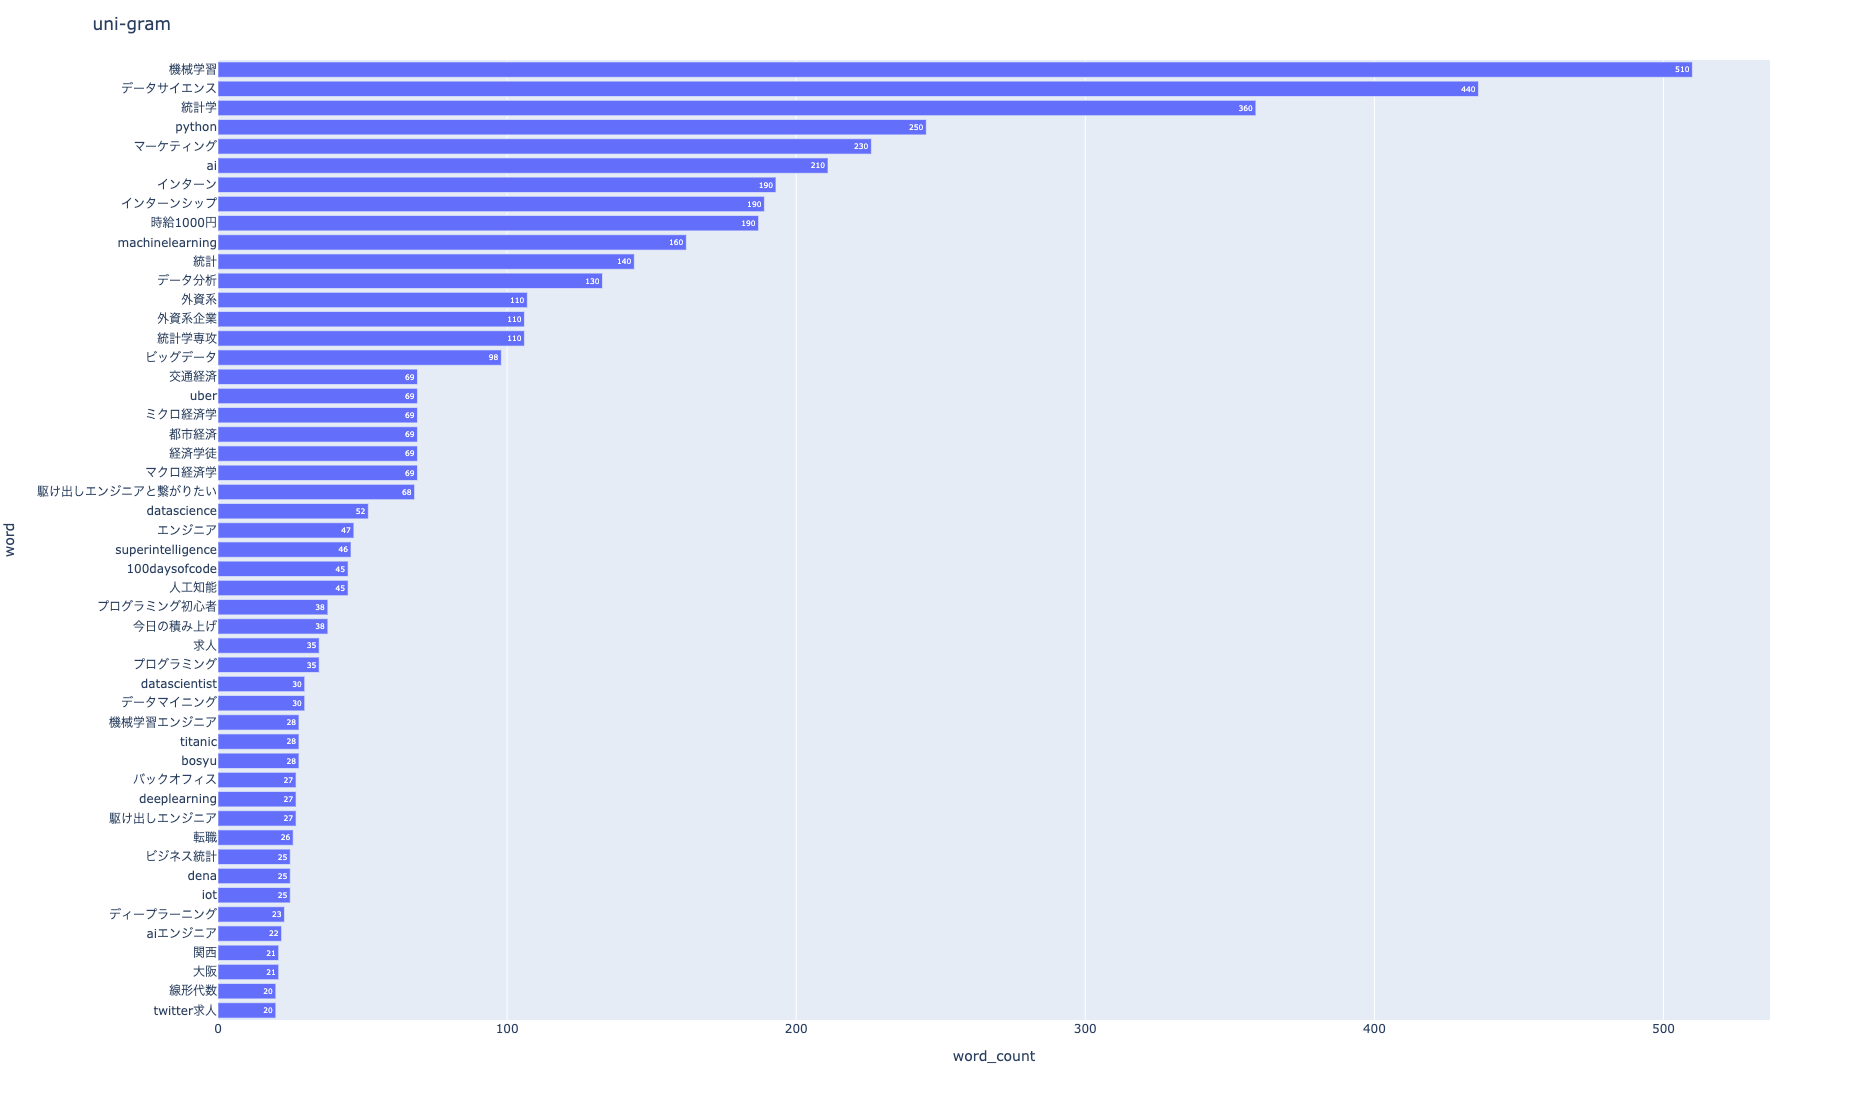

In [7]:
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=True,
)

100%|██████████| 2713/2713 [00:00<00:00, 75189.78it/s]


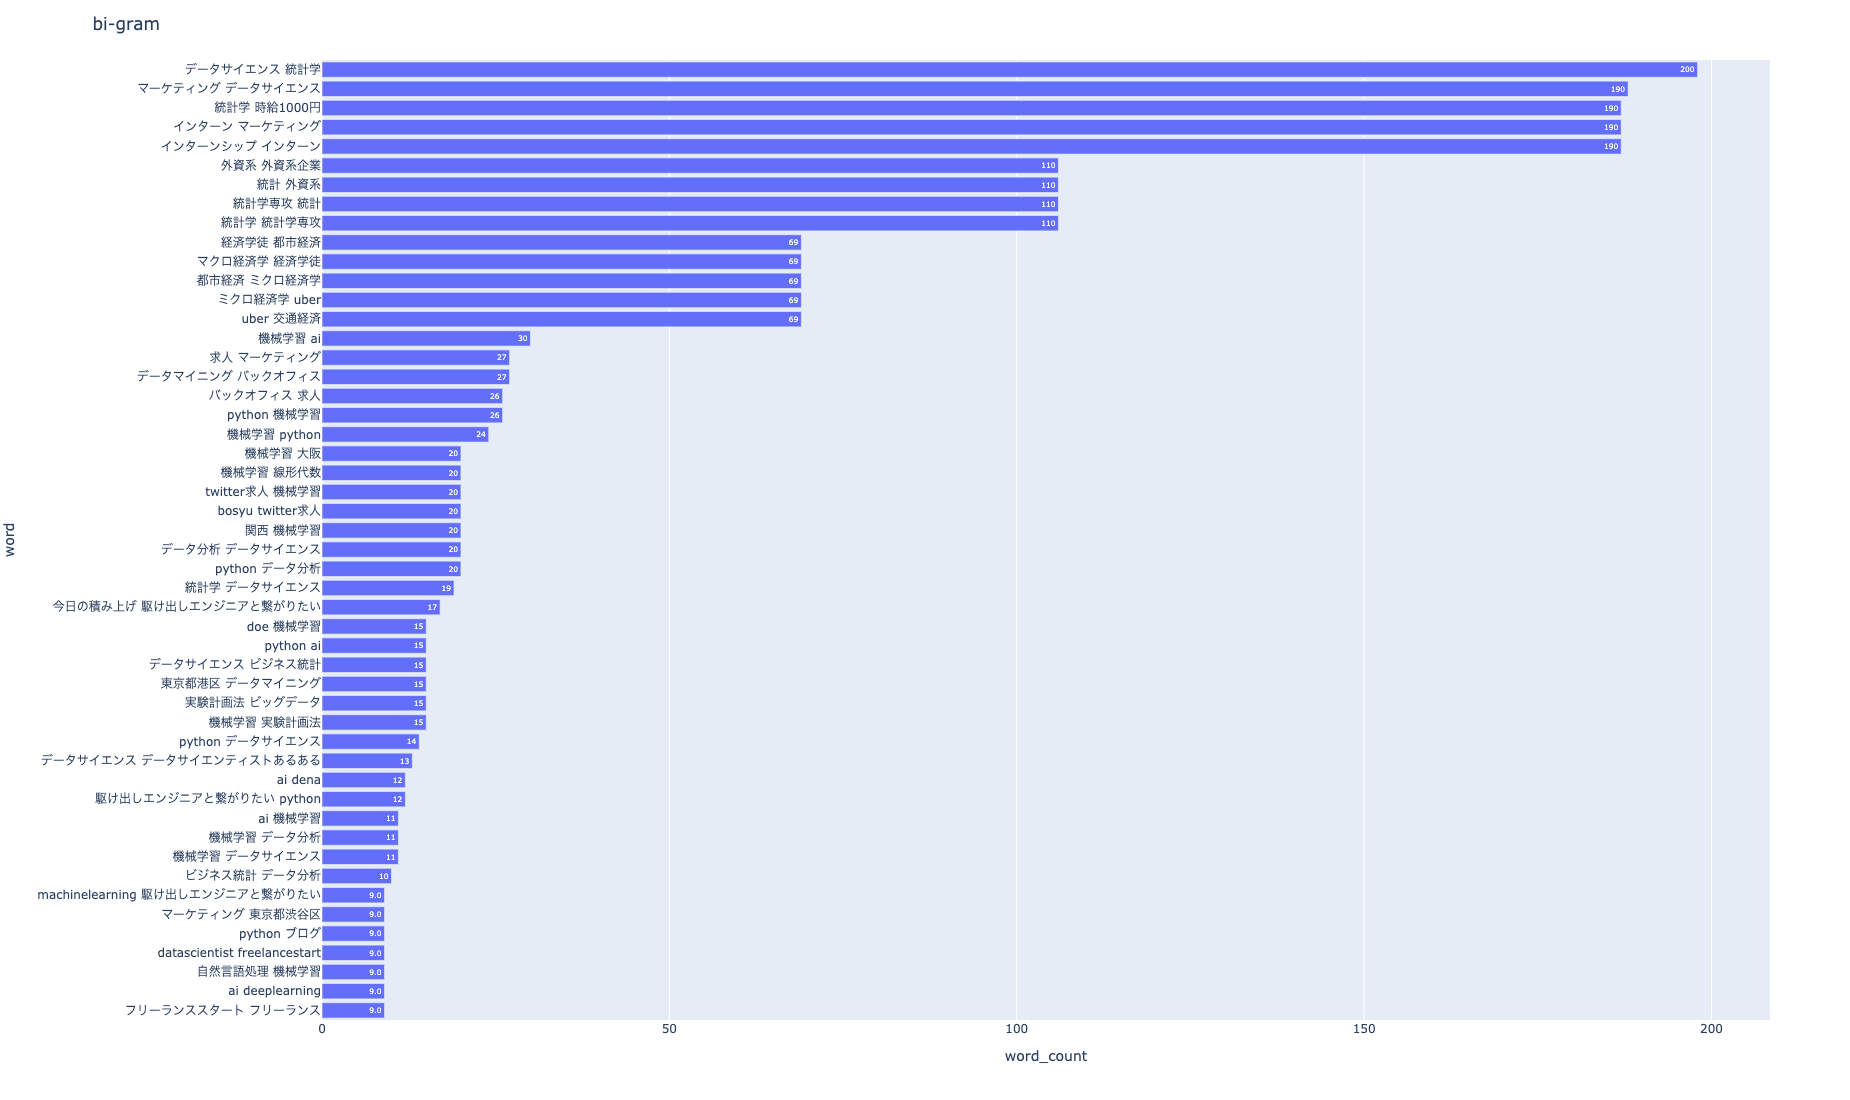

In [8]:
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=True,
)

100%|██████████| 2713/2713 [00:00<00:00, 77344.44it/s]


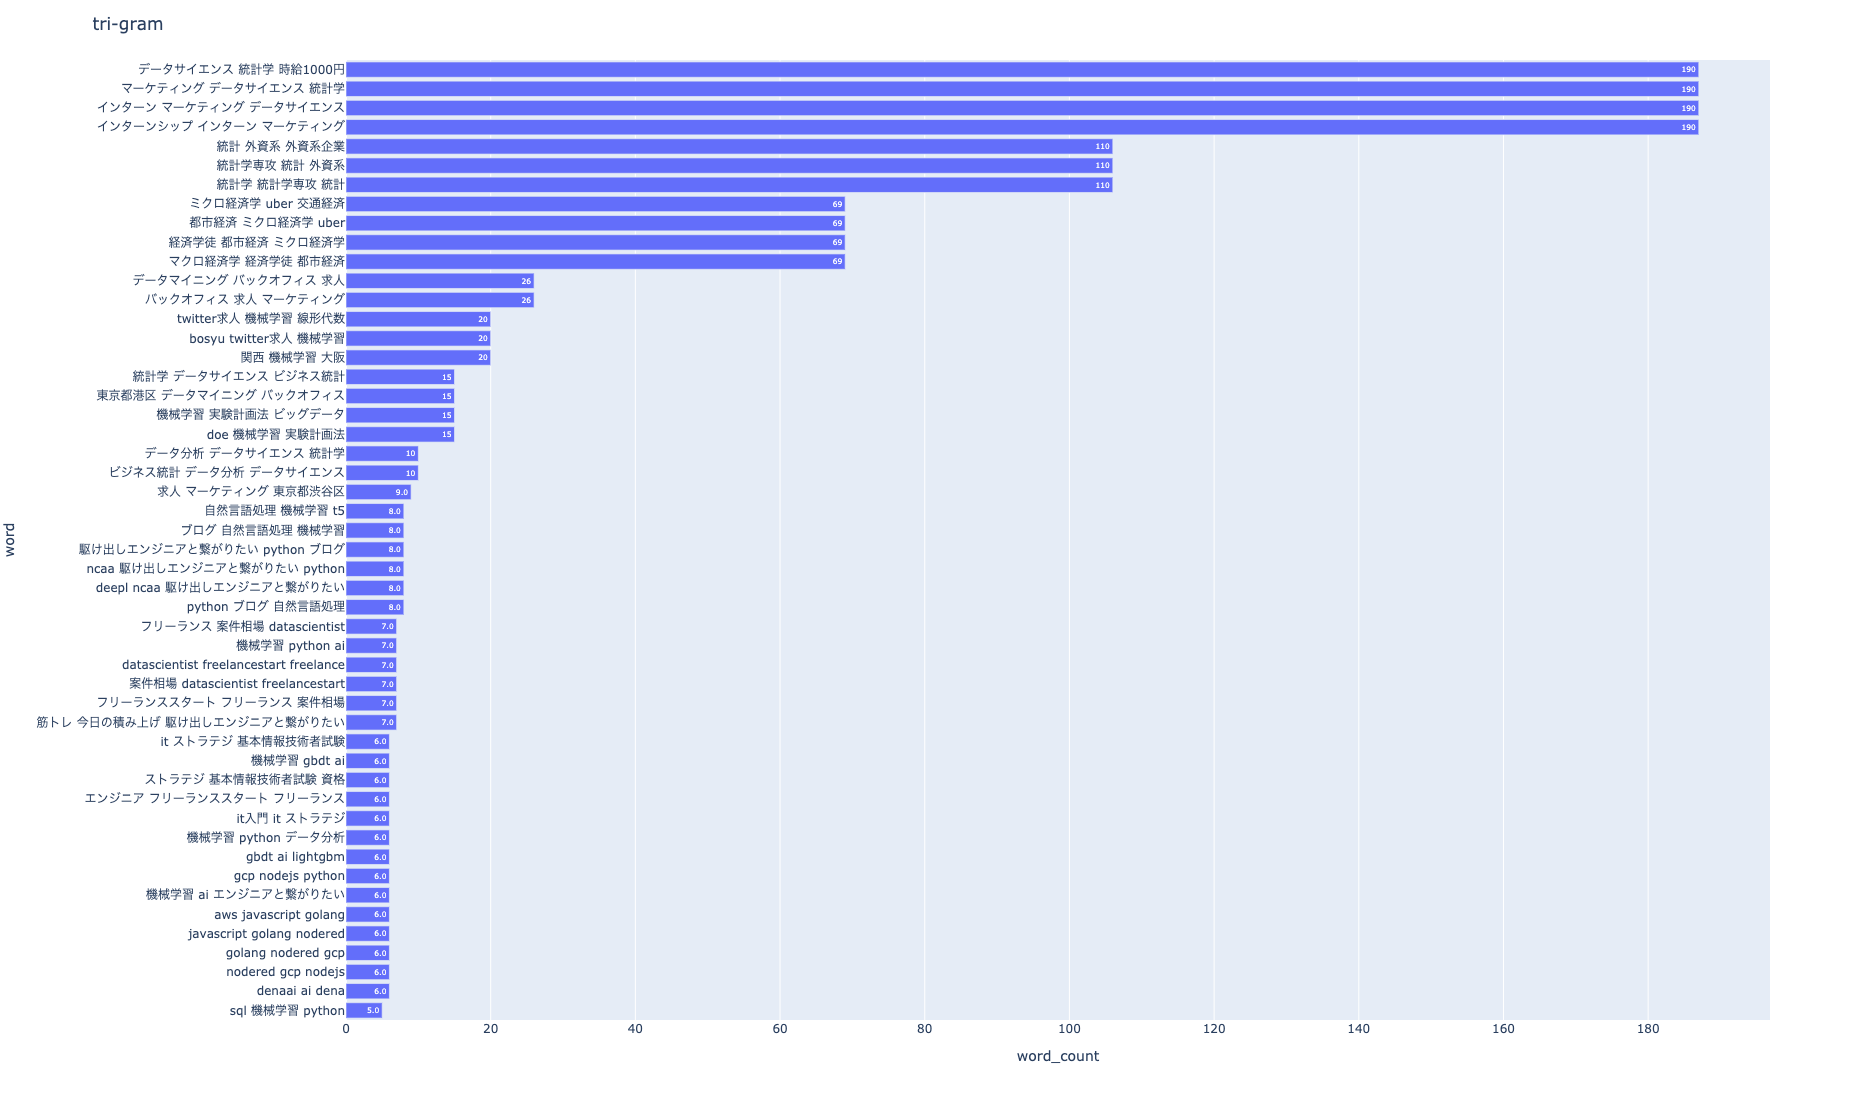

In [9]:
npt.bar_ngram(
    title='tri-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=3,
    top_n=50,
    width=1000,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=True,
)

## ラベルごとに比較する

- 実際のデータ分析の場では、データの切り口を変えながら可視化したい場合がある。その場合は下記のように同時にプロットすることもできる

In [10]:
# #データサイエンティストのfigを取得
fig_unigram_ds = npt_ds.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

# #kaggleのfigを取得
fig_unigram_kaggle = npt_kaggle.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

100%|██████████| 1224/1224 [00:00<00:00, 62372.62it/s]


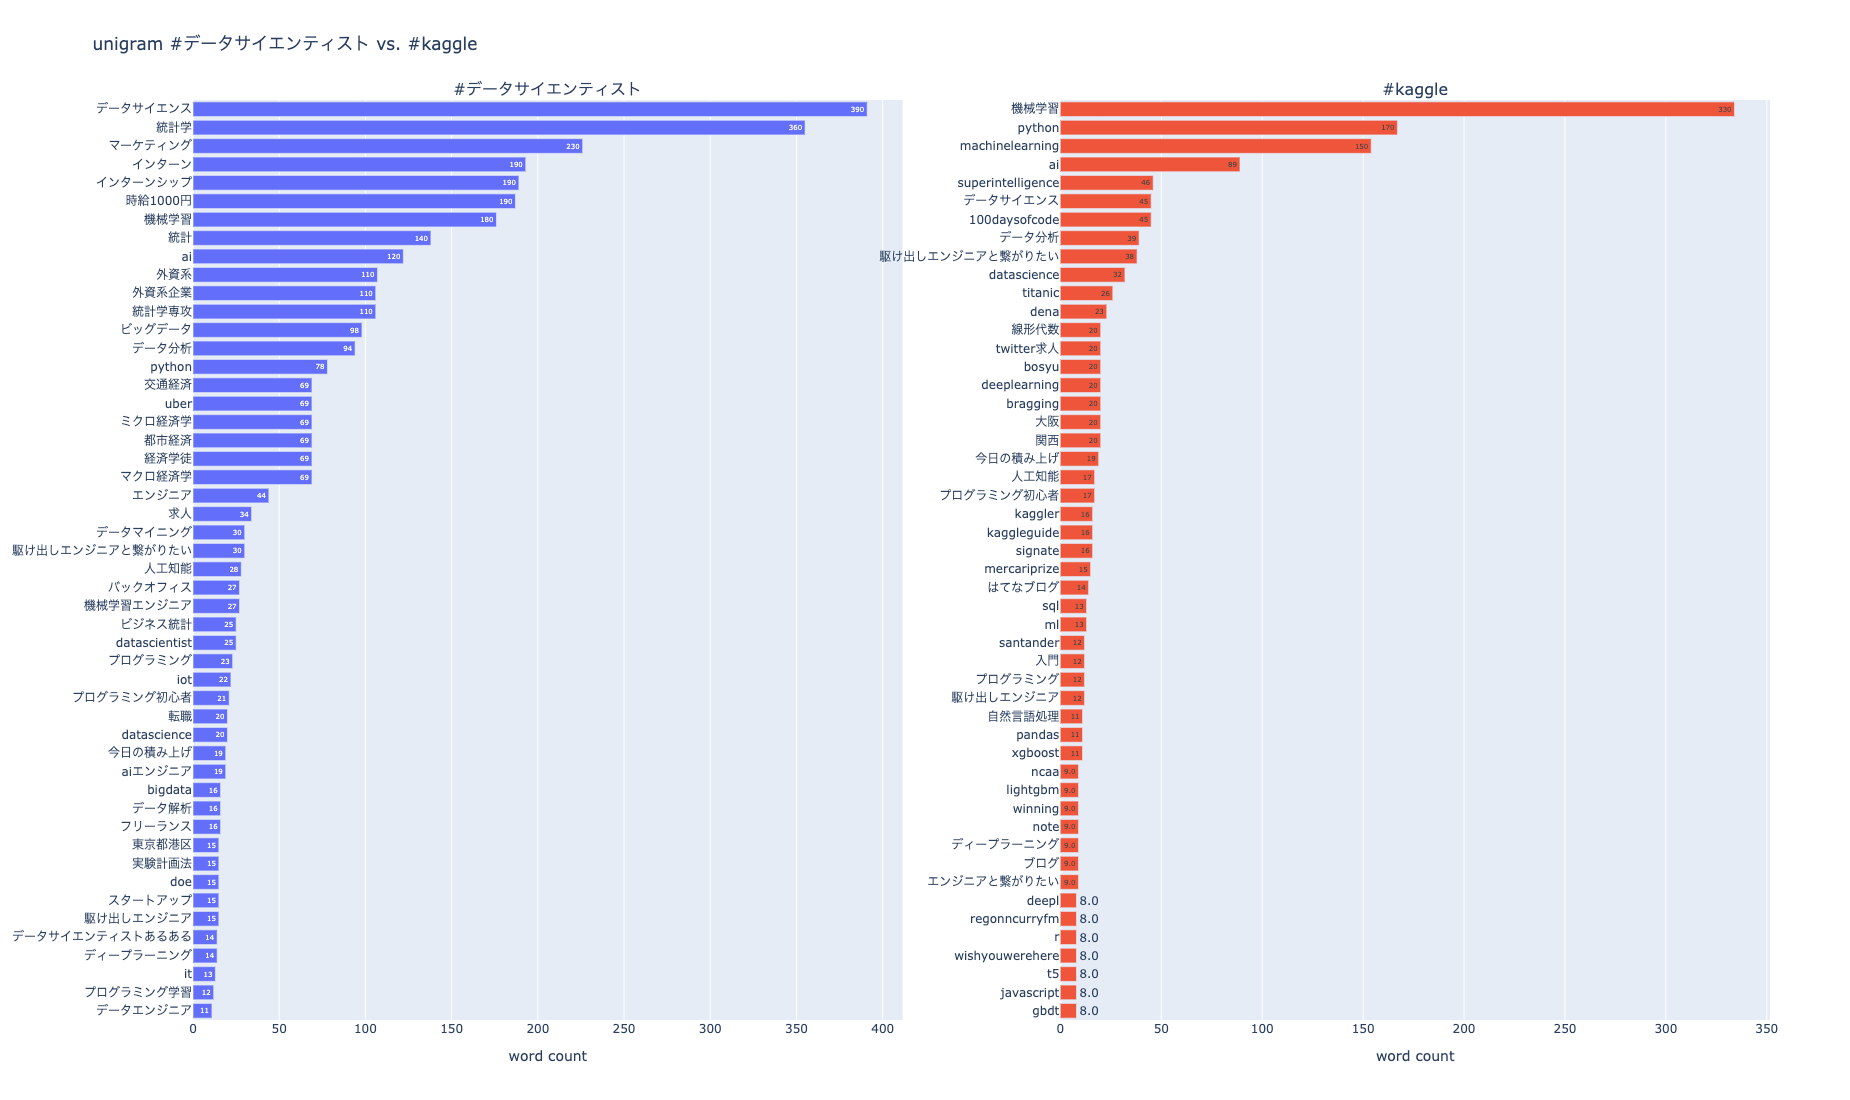

In [11]:
# subplot
trace1 = fig_unigram_ds['data'][0]
trace2 = fig_unigram_kaggle['data'][0]

fig = make_subplots(rows=1, cols=2, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=False)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)

fig.update_layout(height=1100, width=1900, title_text='unigram #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

plotly.offline.plot(fig, filename='unigram #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## 単語出現頻度の分布

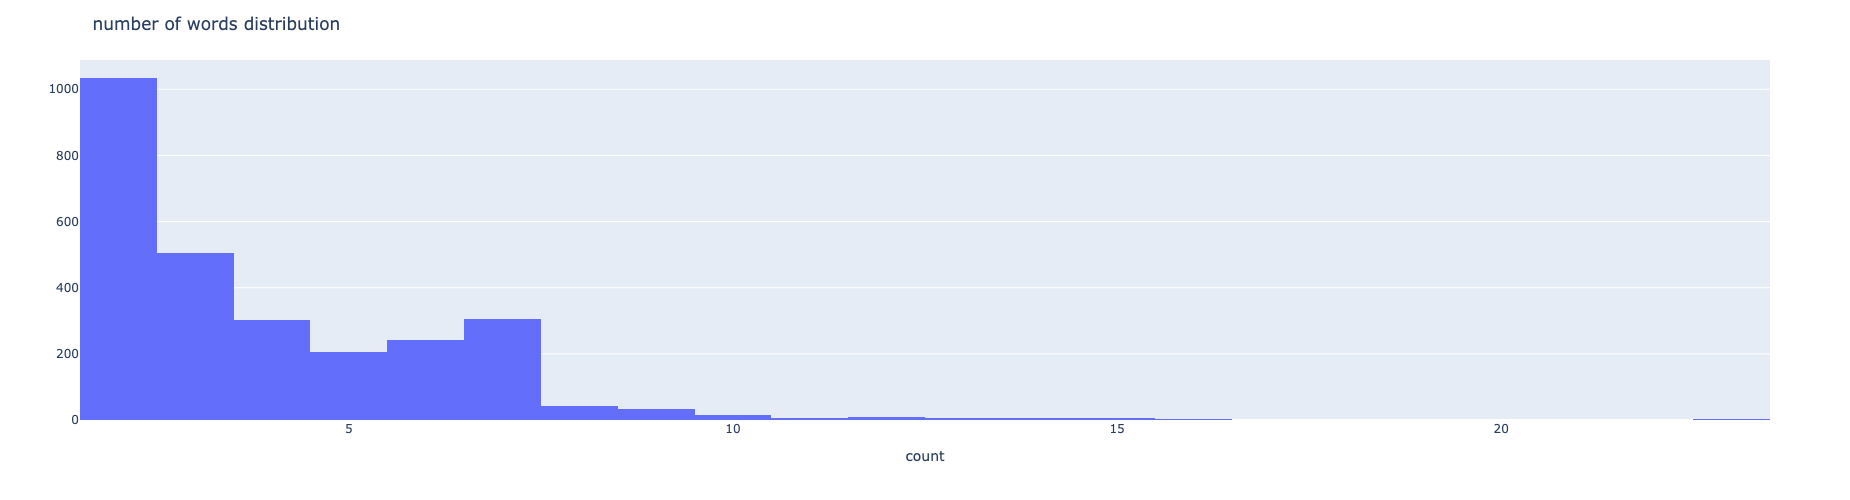

In [12]:
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=True,
)

## ラベル毎

In [13]:
fig_wd_ds = npt_ds.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

fig_wd_kaggle = npt_kaggle.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

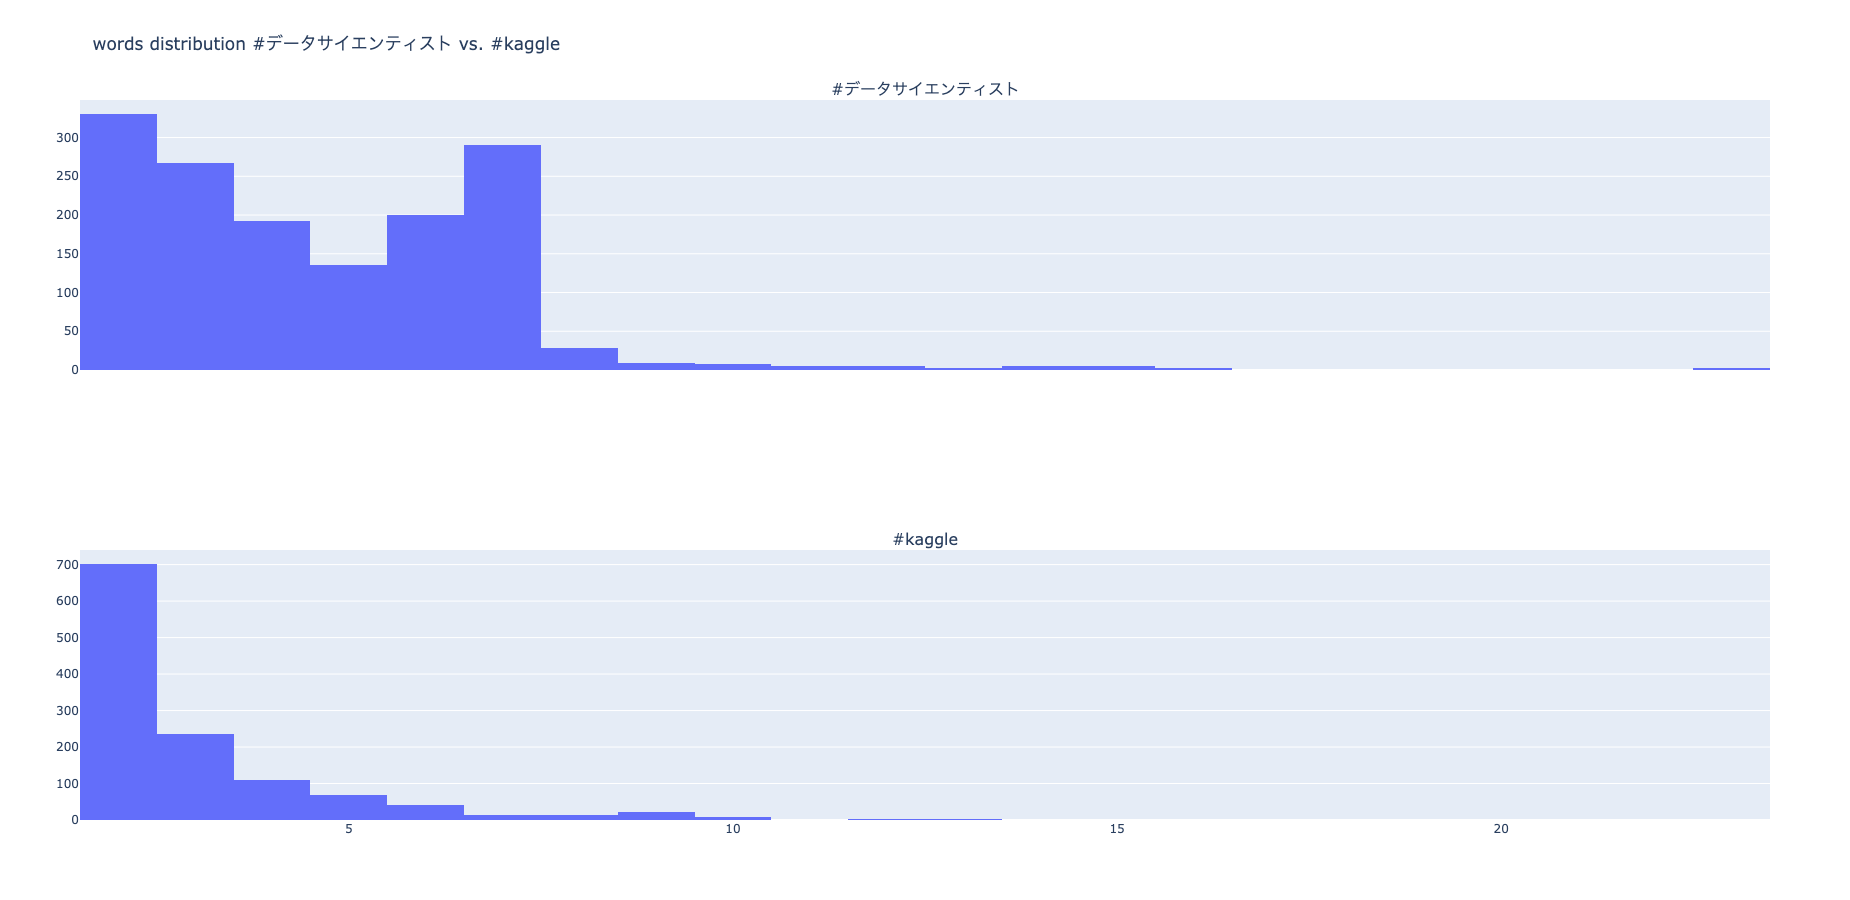

In [14]:
trace1 = fig_wd_ds['data'][0]
trace2 = fig_wd_kaggle['data'][0]

fig = make_subplots(rows=2, cols=1, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=True)

fig.update_layout(height=900, width=1200, title_text='words distribution #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

plotly.offline.plot(fig, filename='words distribution #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## tree map

100%|██████████| 2713/2713 [00:00<00:00, 43781.27it/s]


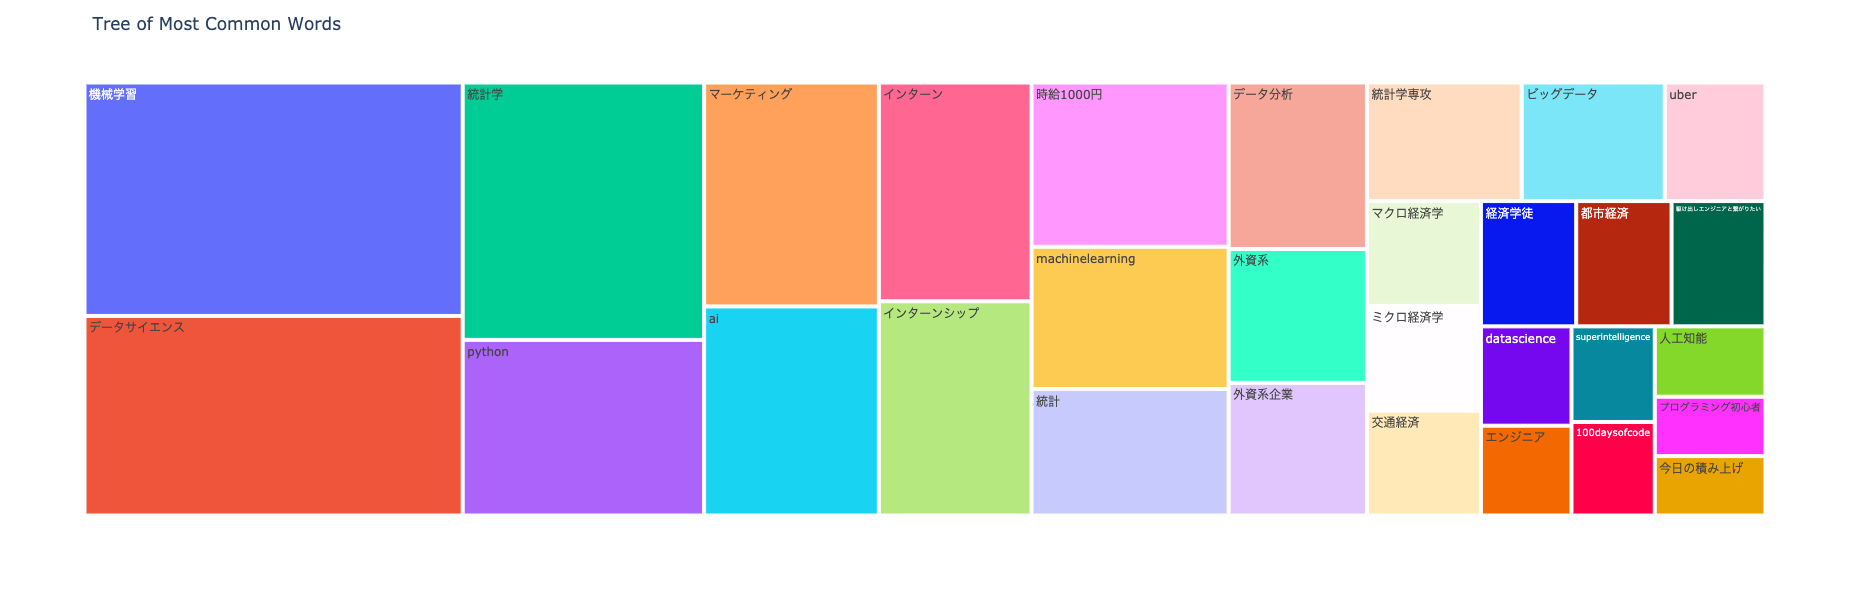

In [15]:
npt.treemap(
    stopwords=stopwords,
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    width=1300,
    height=600,
    verbose=True
)

## word cloud

In [26]:
# npt.wordcloud()

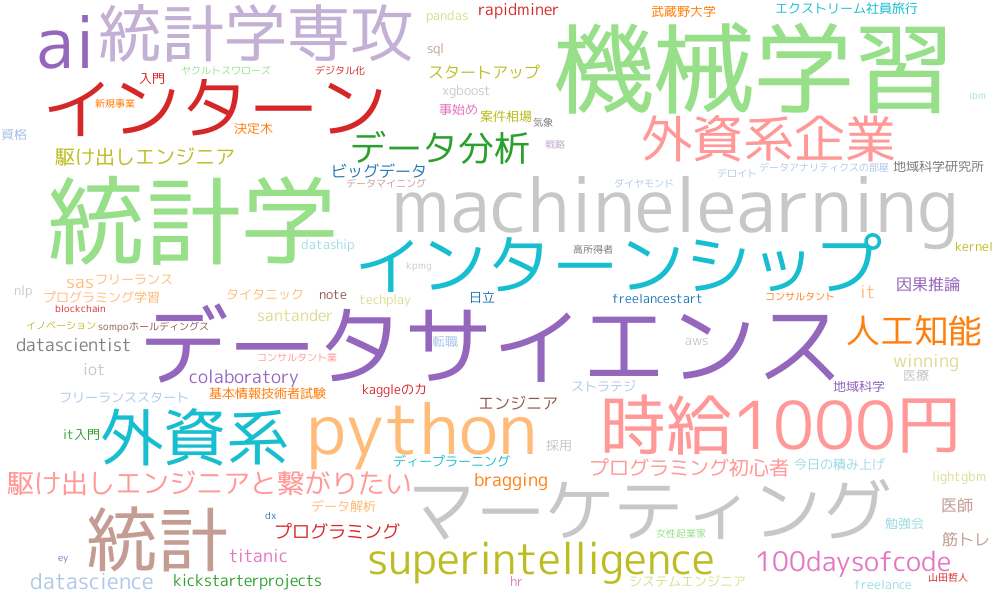

In [16]:
npt.wordcloud(
    stopwords=stopwords,
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

## 共起ネットワーク

In [17]:
npt.build_graph(stopwords=stopwords, min_edge_frequency=11)

node_size:48, edge_size:96


In [18]:
npt_ds.build_graph(stopwords=stopwords, min_edge_frequency=7)

node_size:47, edge_size:100


In [19]:
npt_kaggle.build_graph(stopwords=stopwords, min_edge_frequency=5)

node_size:42, edge_size:105


In [20]:
# display(
#     hoge.node_df.head(), hoge.node_df.shape,
#     hoge.edge_df.head(), hoge.edge_df.shape
# )

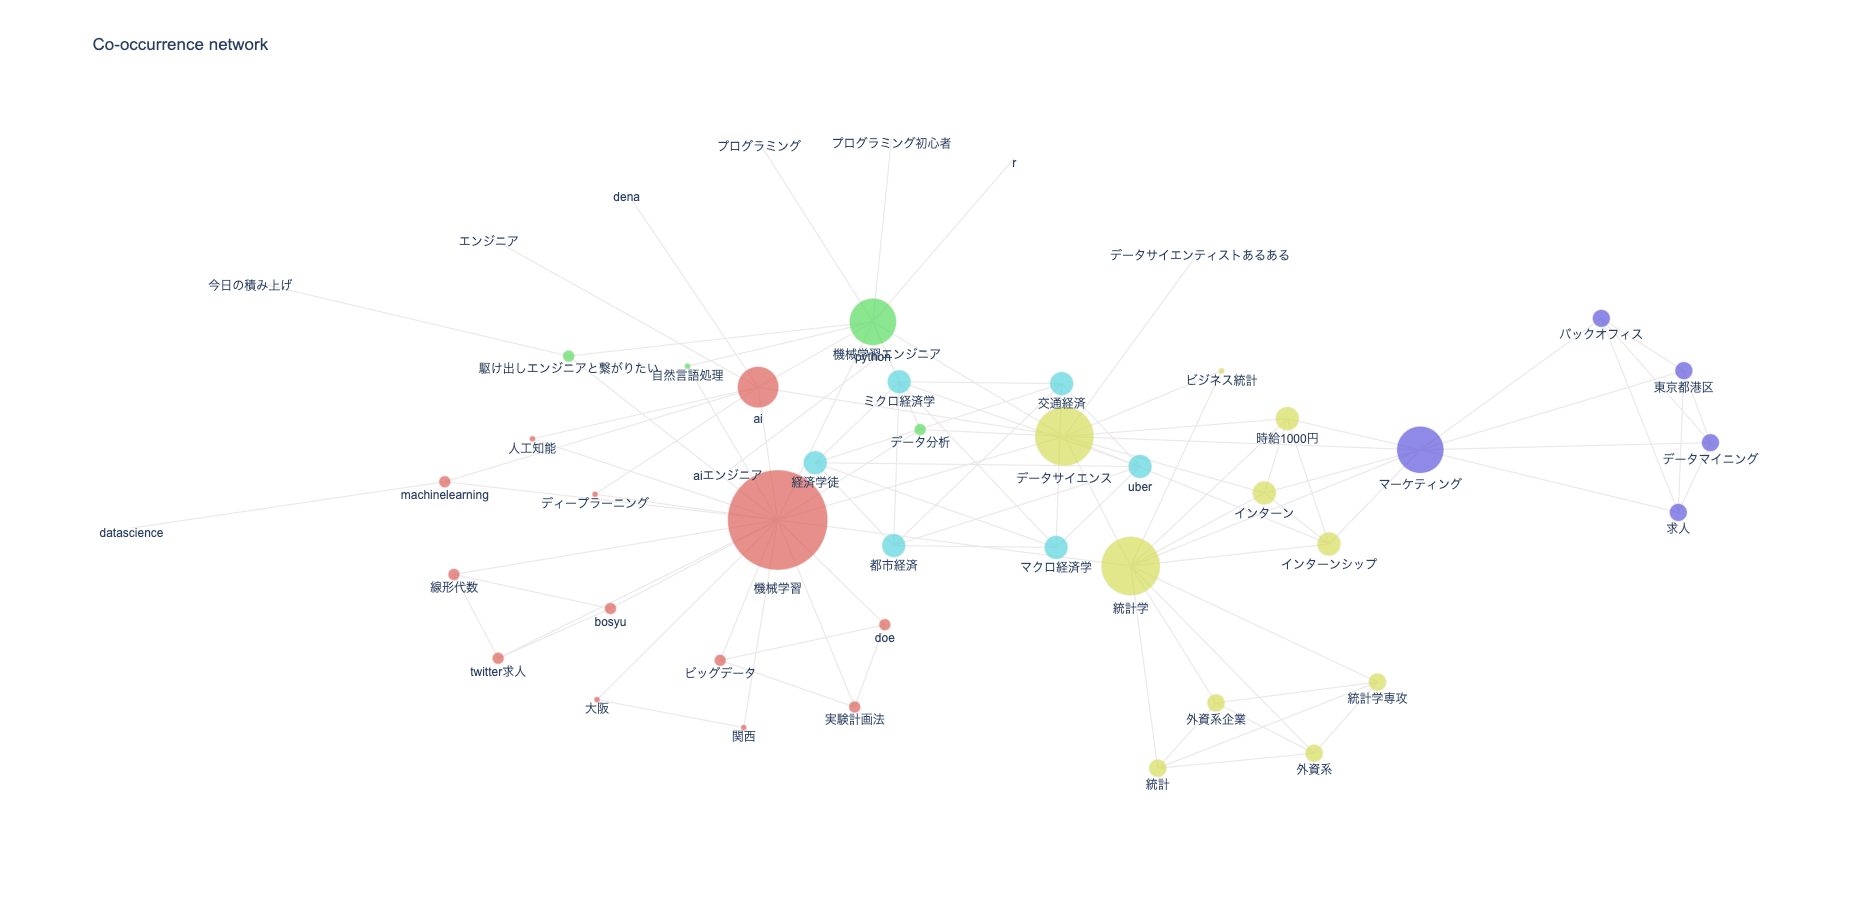

In [21]:
npt.co_network(
    title='Co-occurrence network',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1300,
    height=900,
    save=True
)

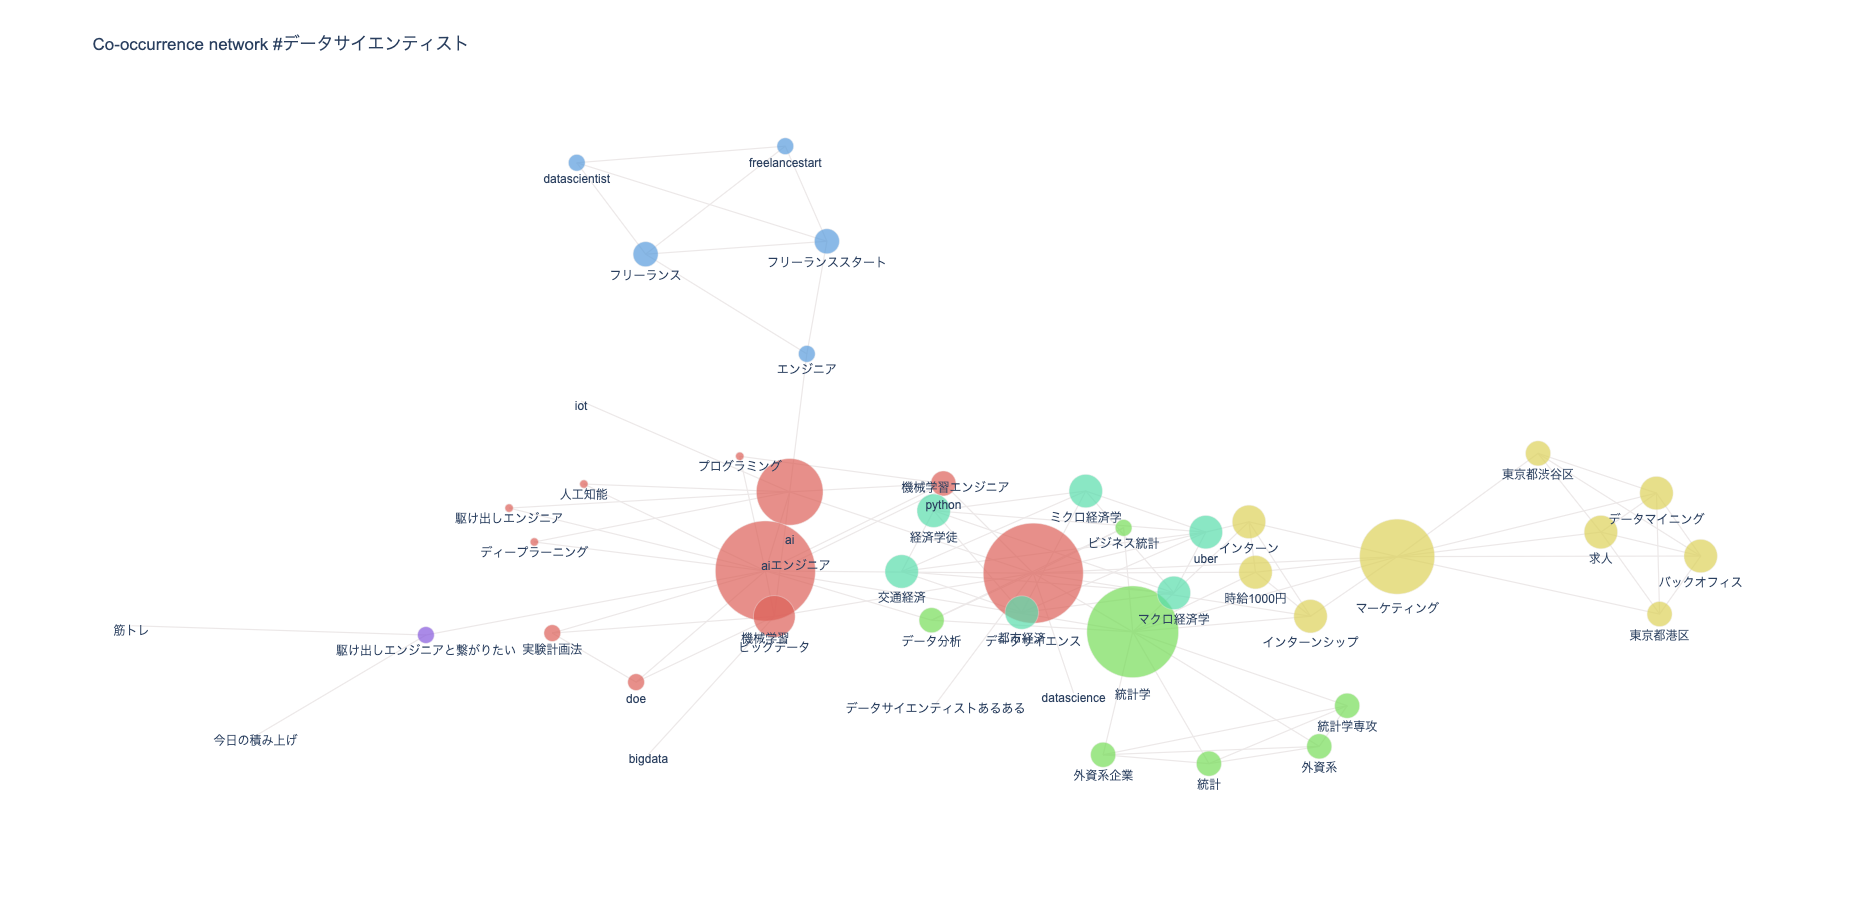

In [22]:
npt_ds.co_network(
    title='Co-occurrence network #データサイエンティスト',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1300,
    height=900,
    save=False
)

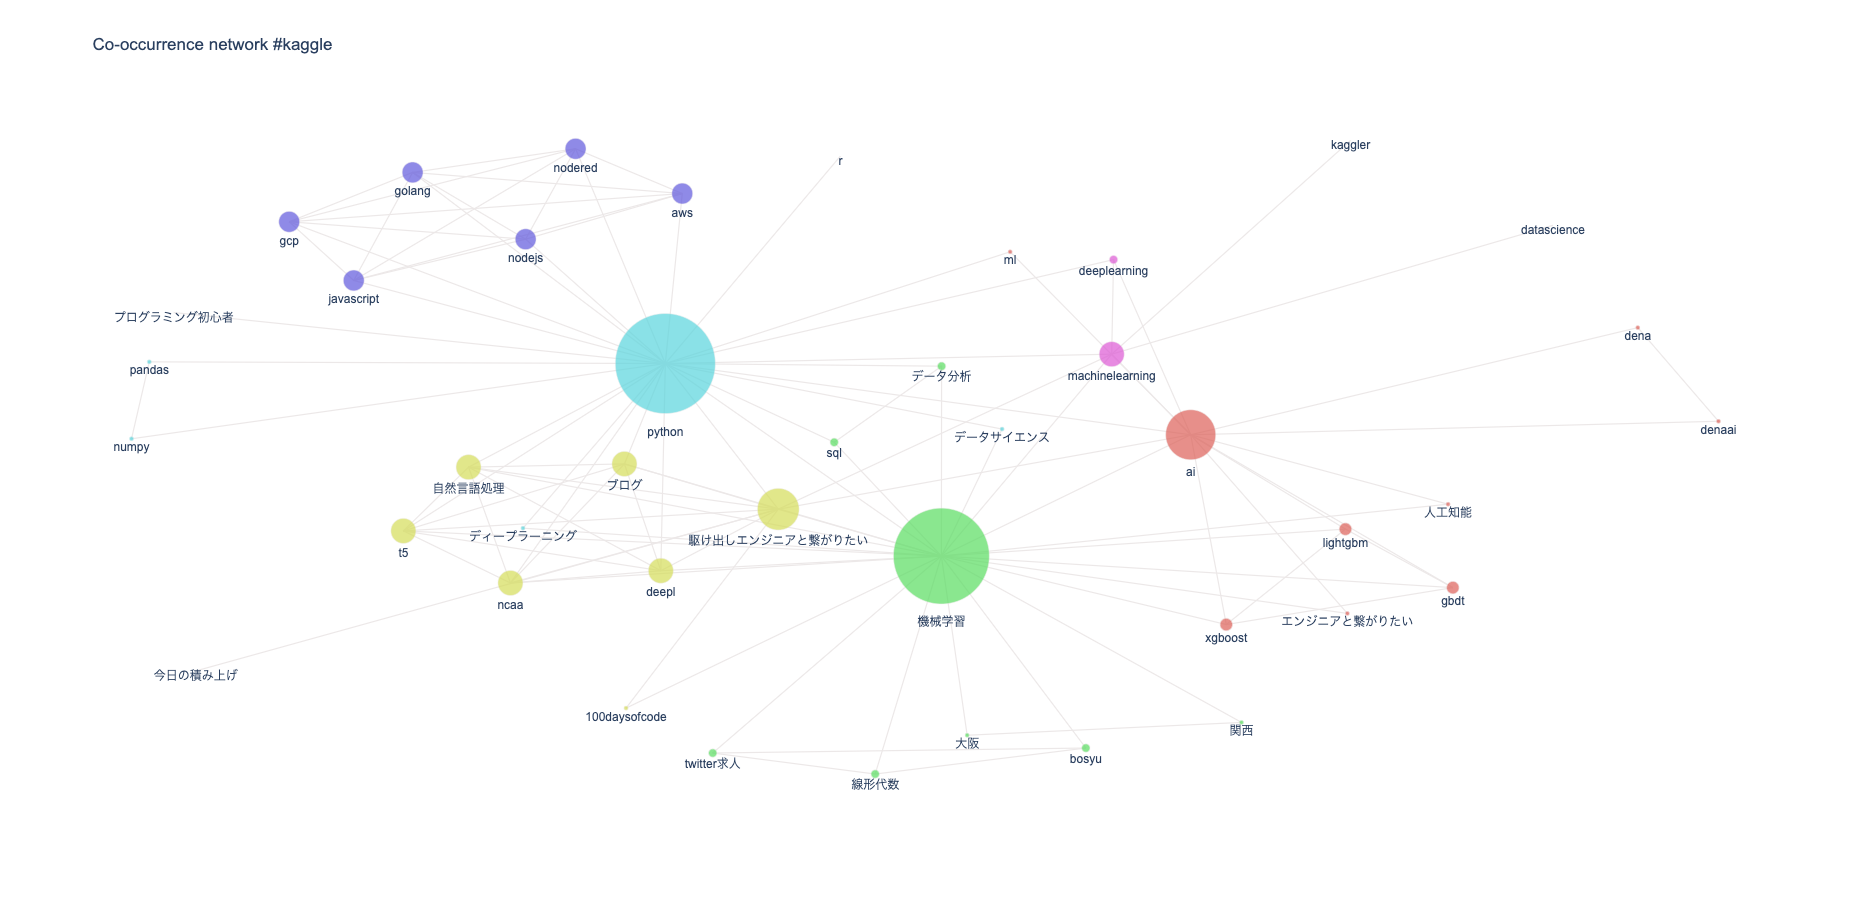

In [23]:
npt_kaggle.co_network(
    title='Co-occurrence network #kaggle',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1300,
    height=900,
    save=False
)

## sunburst

In [24]:
# npt.sunburst(title='sunburst chart', colorscale=True)

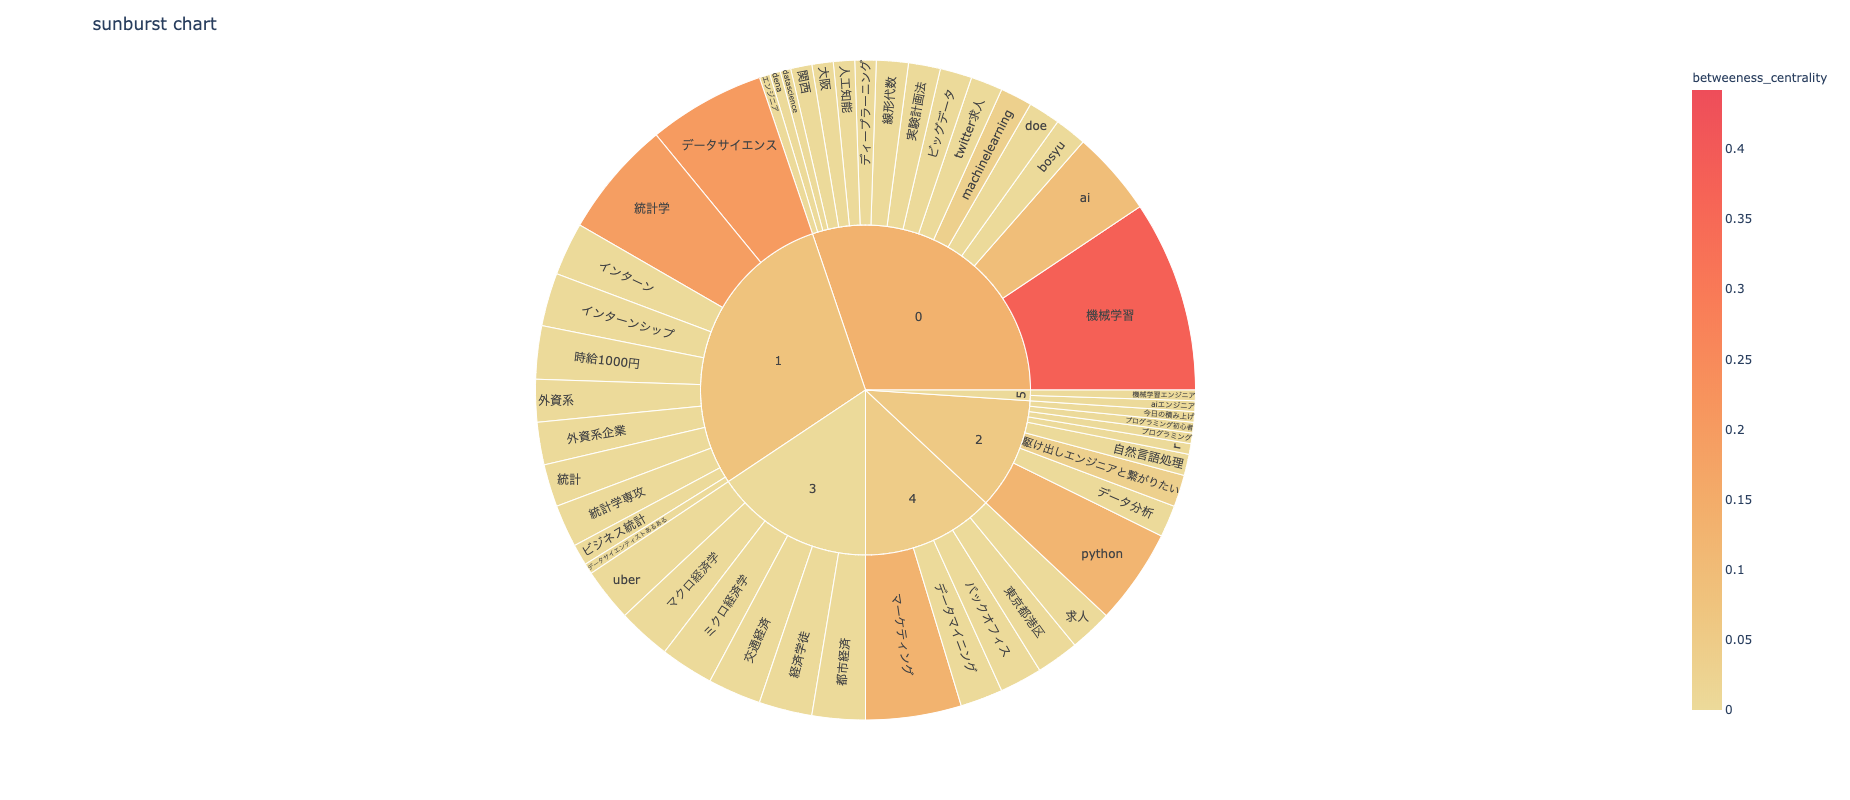

In [25]:
npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=True
)

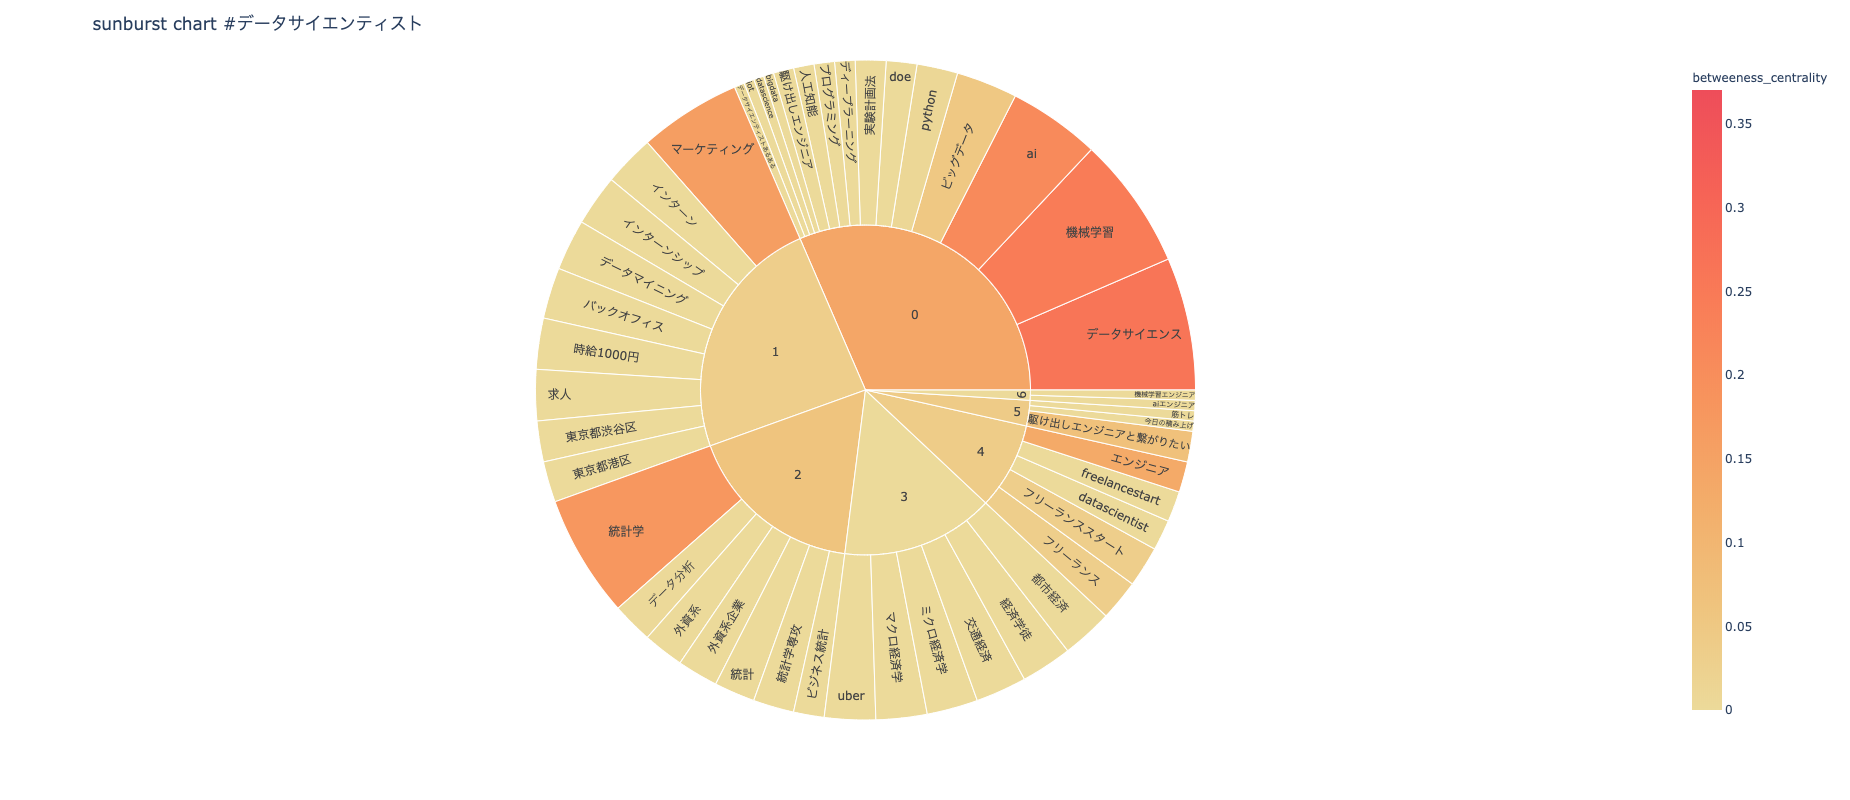

In [26]:
npt_ds.sunburst(
    title='sunburst chart #データサイエンティスト',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

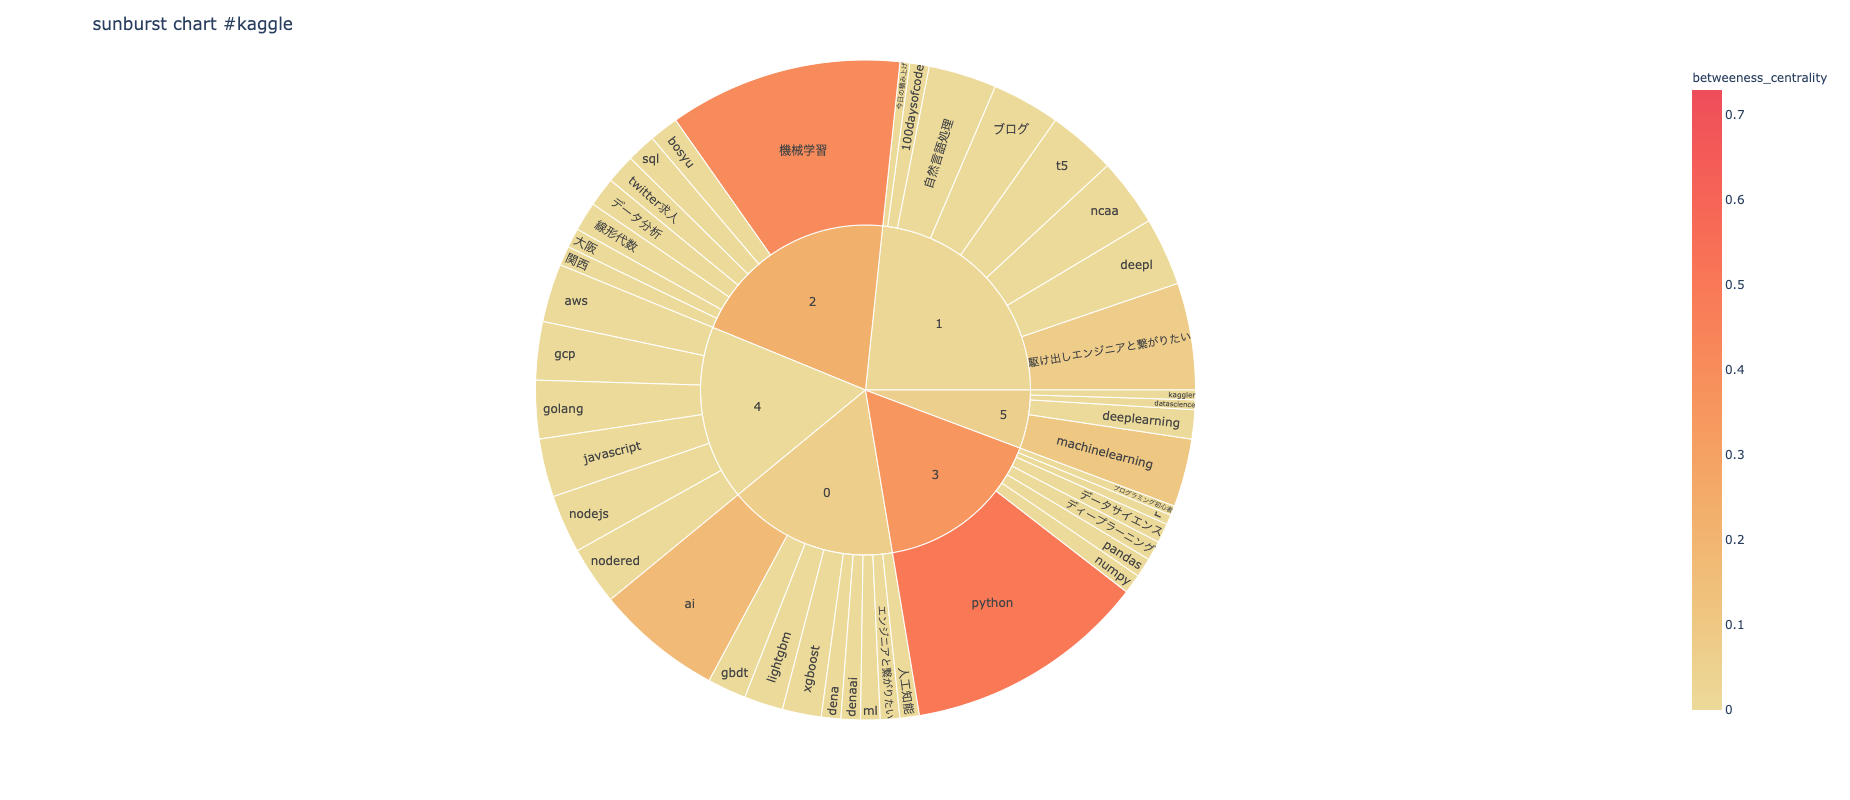

In [27]:
npt_kaggle.sunburst(
    title='sunburst chart #kaggle',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

## LDA

In [28]:
npt.ldavis(num_topics=2, passes=5, save=True)

W0517 11:49:05.770310 4559465920 ldamulticore.py:248] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


PreparedData(topic_coordinates=           x     y  topics  cluster   Freq
topic                                     
0      0.147 0.000       1        1 54.231
1     -0.147 0.000       2        1 45.769, topic_info=     Category     Freq               Term    Total  loglift  logprob
205   Default 1083.000             kaggle 1083.000   30.000   30.000
0     Default 1291.000        データサイエンティスト 1291.000   29.000   29.000
8     Default  373.000           データサイエンス  373.000   28.000   28.000
36    Default  215.000             python  215.000   27.000   27.000
83    Default  193.000            マーケティング  193.000   26.000   26.000
72    Default  143.000    machinelearning  143.000   25.000   25.000
81    Default  165.000              インターン  165.000   24.000   24.000
84    Default  160.000            時給1000円  160.000   23.000   23.000
82    Default  162.000           インターンシップ  162.000   22.000   22.000
21    Default  445.000               機械学習  445.000   21.000   21.000
93    Default   93.000              外資系企業   93.000   20.000   20.000
92    Default   94.000                外資系   94.000   19.000   19.000
95    Default   93.000              統計学専攻   93.000   18.000   18.000
94    Default  126.000                 統計  126.000   17.000   17.000
124   Default   84.000             ビッグデータ   84.000   16.000   16.000
412   Default   59.000               経済学徒   59.000   15.000   15.000
410   Default   59.000             ミクロ経済学   59.000   14.000   14.000
409   Default   59.000             マクロ経済学   59.000   13.000   13.000
1209  Default   41.000  superintelligence   41.000   12.000   12.000
408   Default   59.000               uber   59.000   11.000   11.000
413   Default   59.000               都市経済   59.000   10.000   10.000
411   Default   59.000               交通経済   59.000    9.000    9.000
18    Default  184.000                 ai  184.000    8.000    8.000
7     Default  309.000                統計学  309.000    7.000    7.000
343   Default   24.000       deeplearning   24.000    6.000    6.000
373   Default   30.000                 求人   30.000    5.000    5.000
206   Default   25.000            titanic   25.000    4.000    4.000
1157  Default   40.000      100daysofcode   40.000    3.000    3.000
9     Default   26.000           データマイニング   26.000    2.000    2.000
371   Default   23.000            バックオフィス   23.000    1.000    1.000
84     Topic1  159.162            時給1000円  160.430    0.604   -3.589
83     Topic1  192.035            マーケティング  193.716    0.603   -3.401
82     Topic1  160.613           インターンシップ  162.144    0.602   -3.580
81     Topic1  163.705              インターン  165.566    0.601   -3.561
124    Topic1   82.867             ビッグデータ   84.509    0.592   -4.242
9      Topic1   25.846           データマイニング   26.465    0.588   -5.407
518    Topic1   21.582             ビジネス統計   22.199    0.584   -5.587
412    Topic1   58.063               経済学徒   59.769    0.583   -4.598
371    Topic1   23.222            バックオフィス   23.907    0.583   -5.514
410    Topic1   57.882             ミクロ経済学   59.775    0.580   -4.601
373    Topic1   29.682                 求人   30.743    0.577   -5.269
409    Topic1   57.521             マクロ経済学   59.784    0.573   -4.607
211    Topic1   13.140                doe   13.665    0.573   -6.084
372    Topic1   13.119              東京都港区   13.665    0.571   -6.085
212    Topic1   13.117              実験計画法   13.665    0.571   -6.085
408    Topic1   57.310               uber   59.791    0.570   -4.611
85     Topic1   23.732          機械学習エンジニア   24.770    0.569   -5.492
154    Topic1   12.261    データサイエンティストあるある   12.812    0.568   -6.153
620    Topic1   18.797            aiエンジニア   19.646    0.568   -5.726
413    Topic1   57.194               都市経済   59.794    0.567   -4.613
8      Topic1  355.685           データサイエンス  373.331    0.563   -2.785
411    Topic1   56.948               交通経済   59.801    0.563   -4.617
50     Topic1   13.729             フリーランス   14.525    0.556   -6.040
474    Topic1    8.043             東京都渋谷区    8.545    0.551